In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import dabl

In [3]:
data = pd.read_csv('C:\\Users\\RAM\\Downloads\\EDA on Human Resources Data\\EDA on Human Resources Data\\Employee_Data.csv')
data.shape

(1470, 17)

In [4]:
data.columns

Index(['Unnamed: 0', 'EmployeeNumber', 'Age', 'Gender', 'MaritalStatus',
       'EducationField', 'Department', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'Attrition'],
      dtype='object')

In [5]:
data.head()

,Unnamed: 0,EmployeeNumber,Age,Gender,MaritalStatus,EducationField,Department,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
0,0,1,41,Female,Single,Life Sciences,Sales,2,5993,8,Yes,3,11,8,6,4,Yes
1,1,2,49,Male,Married,Life Sciences,Research & Development,2,5130,1,No,4,23,10,10,7,No
2,2,4,37,Male,Single,Other,Research & Development,1,2090,6,Yes,3,15,7,0,0,Yes
3,3,5,33,Female,Married,Life Sciences,Research & Development,1,2909,1,Yes,3,11,8,8,7,No
4,4,7,27,Male,Married,Medical,Research & Development,1,3468,9,No,3,12,6,2,2,No


In [6]:
data=data.iloc[:,1:]

In [7]:
data.shape

(1470, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   EmployeeNumber      1470 non-null   int64 
 1   Age                 1470 non-null   int64 
 2   Gender              1470 non-null   object
 3   MaritalStatus       1470 non-null   object
 4   EducationField      1470 non-null   object
 5   Department          1470 non-null   object
 6   JobLevel            1470 non-null   int64 
 7   MonthlyIncome       1470 non-null   int64 
 8   NumCompaniesWorked  1470 non-null   int64 
 9   OverTime            1470 non-null   object
 10  PerformanceRating   1470 non-null   int64 
 11  PercentSalaryHike   1470 non-null   int64 
 12  TotalWorkingYears   1470 non-null   int64 
 13  YearsAtCompany      1470 non-null   int64 
 14  YearsInCurrentRole  1470 non-null   int64 
 15  Attrition           1470 non-null   object
dtypes: int64(10), object(6)


In [9]:
data.describe(include='all').iloc[:,1:].style.background_gradient(cmap = 'Wistia')

,Age,Gender,MaritalStatus,EducationField,Department,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition
count,1470.000000,1470,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470
unique,nan,2,3,6,3,nan,nan,nan,2,nan,nan,nan,nan,nan,2
top,nan,Male,Married,Life Sciences,Research & Development,nan,nan,nan,No,nan,nan,nan,nan,nan,No
freq,nan,882,673,606,961,nan,nan,nan,1054,nan,nan,nan,nan,nan,1233
mean,36.923810,nan,nan,nan,nan,2.063946,6502.931293,2.693197,nan,3.153741,15.209524,11.279592,7.008163,4.229252,nan
std,9.135373,nan,nan,nan,nan,1.106940,4707.956783,2.498009,nan,0.360824,3.659938,7.780782,6.126525,3.623137,nan
min,18.000000,nan,nan,nan,nan,1.000000,1009.000000,0.000000,nan,3.000000,11.000000,0.000000,0.000000,0.000000,nan
25%,30.000000,nan,nan,nan,nan,1.000000,2911.000000,1.000000,nan,3.000000,12.000000,6.000000,3.000000,2.000000,nan
50%,36.000000,nan,nan,nan,nan,2.000000,4919.000000,2.000000,nan,3.000000,14.000000,10.000000,5.000000,3.000000,nan
75%,43.000000,nan,nan,nan,nan,3.000000,8379.000000,4.000000,nan,3.000000,18.000000,15.000000,9.000000,7.000000,nan


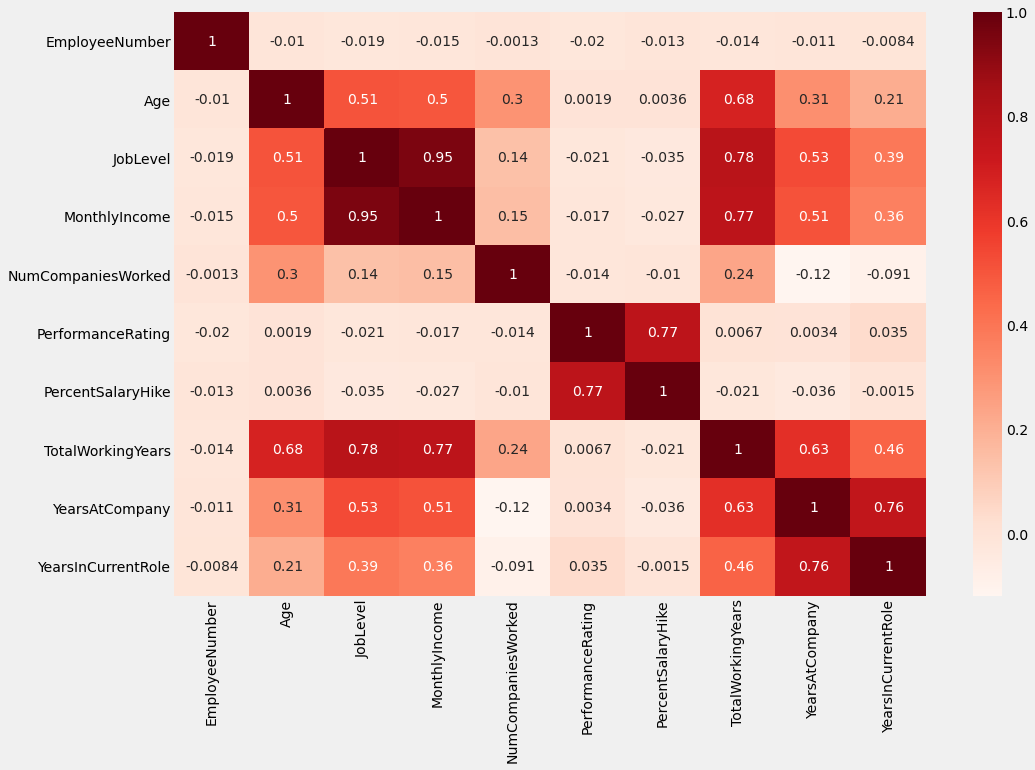

In [10]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
sns.heatmap(data.corr(), cmap = 'Reds', annot=True)
plt.show()

Target looks like classification
Linear Discriminant Analysis training set score: 0.500


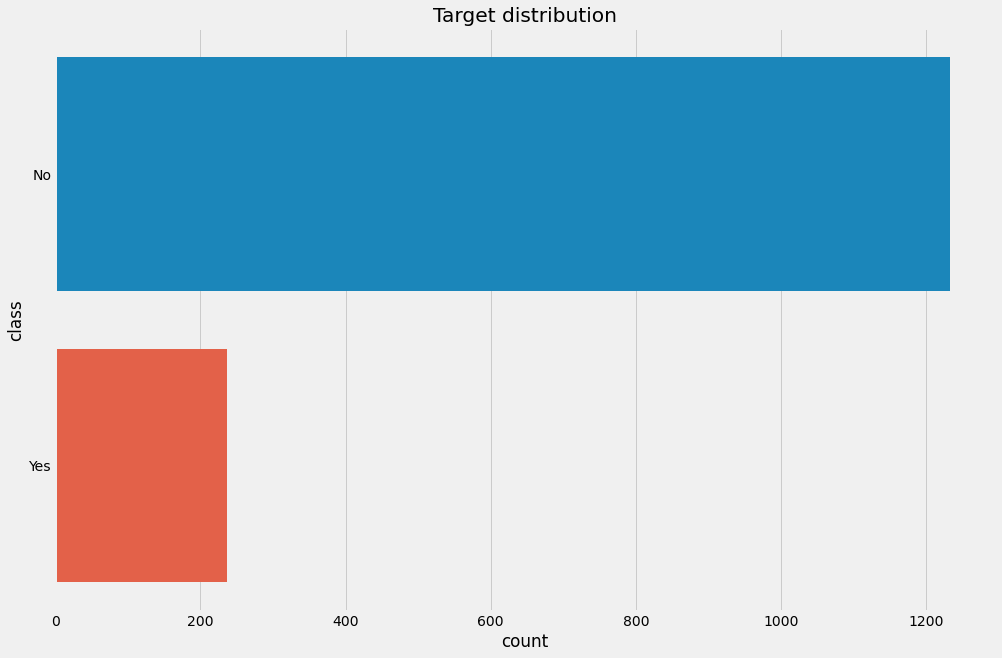

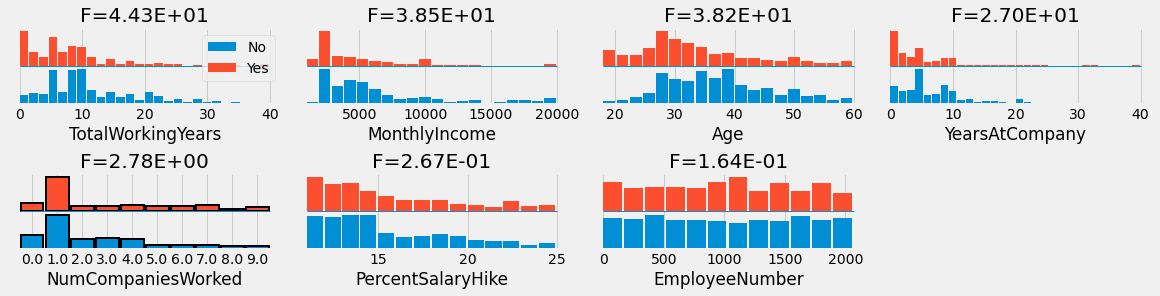

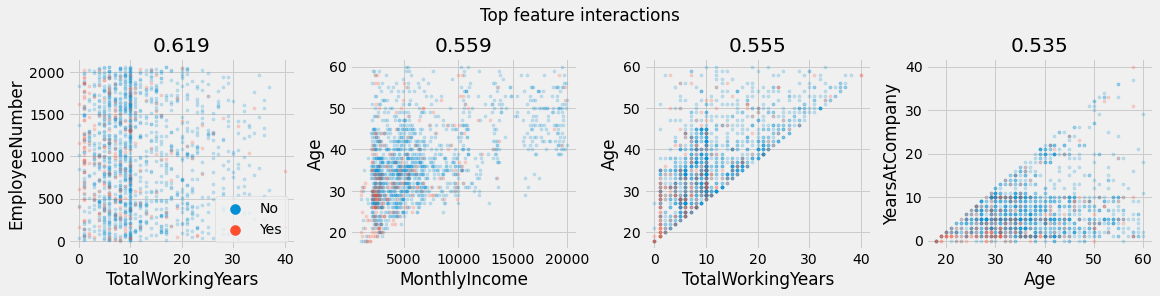

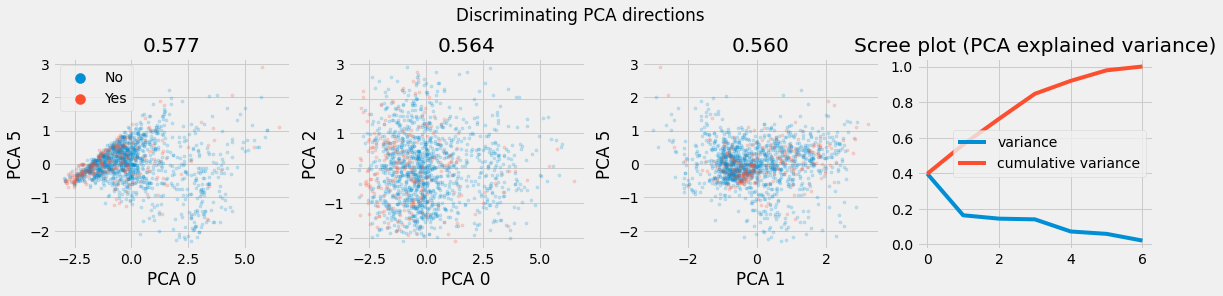

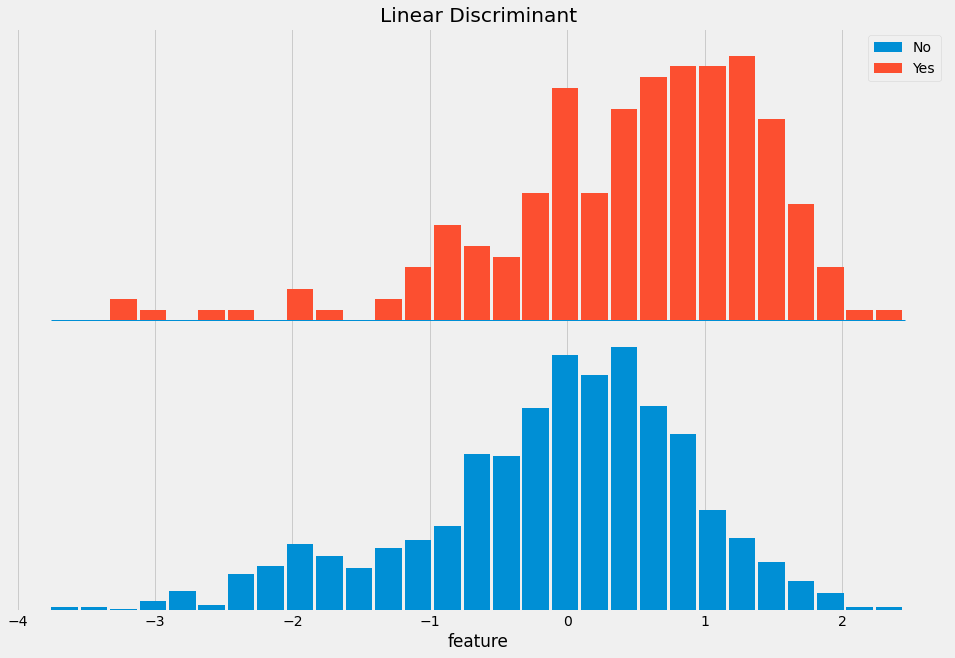

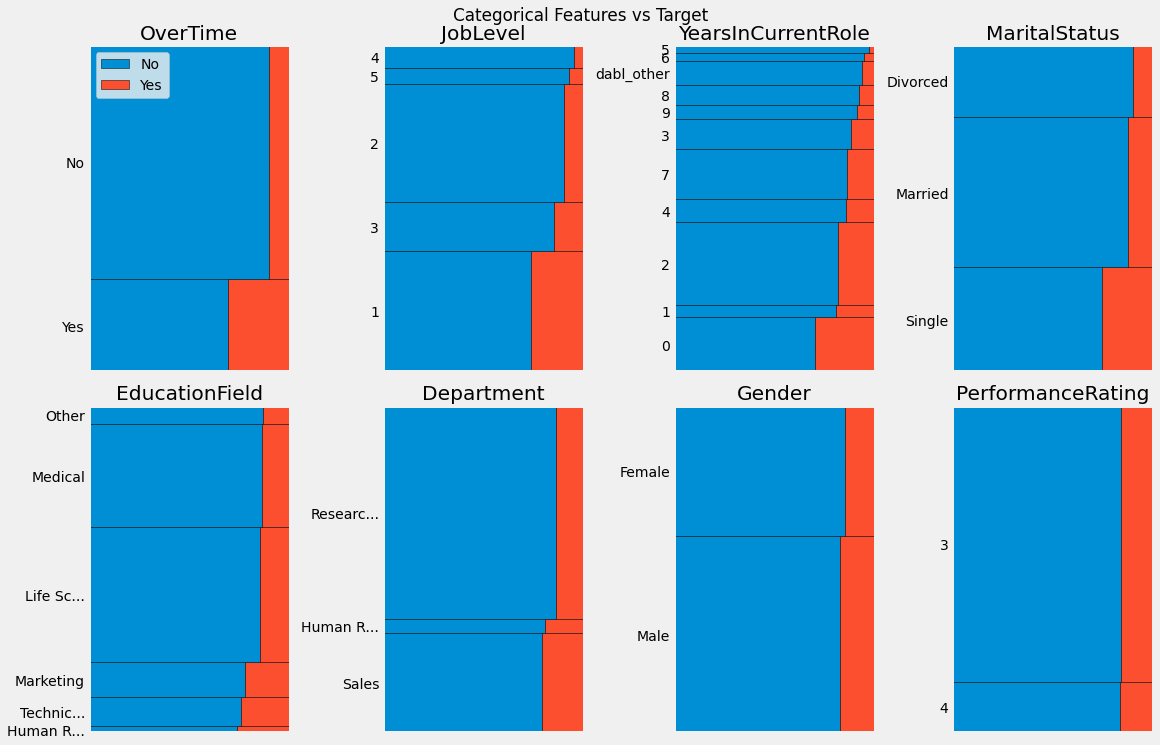

In [11]:
dabl.plot(data, target_col = 'Attrition')

In [12]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:]),
          column2 = list(data.select_dtypes('number').columns[2:])):
    print("Correlation :", data[column1].corr(data[column2]))

interactive(children=(Dropdown(description='column1', options=('Age', 'JobLevel', 'MonthlyIncome', 'NumCompani…

In [13]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:]),
          column2 = list(data.select_dtypes('number').columns[2:])):
    print("Covariance :", data[column1].cov(data[column2]))

interactive(children=(Dropdown(description='column1', options=('Age', 'JobLevel', 'MonthlyIncome', 'NumCompani…

In [14]:
@interact
def check(column1 = list(data.select_dtypes('number').columns[1:])):
    print("Maximum :", data[column1].max())
    print('Minumum :', data[column1].min())
    print('Average :',data[column1].mean())
    print('Standard Deviation :',data[column1].std())
    print('Variance :', data[column1].var())
    

interactive(children=(Dropdown(description='column1', options=('Age', 'JobLevel', 'MonthlyIncome', 'NumCompani…

In [15]:
@interact
def check(column1 = ['MonthlyIncome'],
          values = 18000):
    x = data[data[column1] > values][['EmployeeNumber','MonthlyIncome']]
    x = x.sort_values(by = 'MonthlyIncome', ascending = False)
    return x

interactive(children=(Dropdown(description='column1', options=('MonthlyIncome',), value='MonthlyIncome'), IntS…

In [16]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [17]:
@interact_manual
def check(column1 = list(data.select_dtypes('number').columns[1:]),
          column2 = list(data.select_dtypes('number').columns[2:])):
    sns.scatterplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('Age', 'JobLevel', 'MonthlyIncome', 'NumCompani…

In [18]:
@interact_manual
def check(column1 = list(data.select_dtypes('object').columns[1:]),
          column2 = list(data.select_dtypes('number').columns[2:]),
          colors = ['Dark2','pink','Blues', 'Reds','Wistia','copper']):
    sns.barplot(data[column1], data[column2], palette = colors)
    plt.title('Categorical vs Numerical Analysis')

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [19]:
@interact_manual
def check(column1 = list(data.select_dtypes('object').columns[1:]),
          column2 = list(data.select_dtypes('number').columns[2:])):
    sns.violinplot(data[column1], data[column2])

interactive(children=(Dropdown(description='column1', options=('MaritalStatus', 'EducationField', 'Department'…

In [20]:
data[['EmployeeNumber',
      'Department',
      'MonthlyIncome']].groupby(['Department']).agg('min')

,EmployeeNumber,MonthlyIncome
Department,,
Human Resources,103,1555
Research & Development,2,1009
Sales,1,1052


In [21]:
data[['EmployeeNumber',
      'Department',
      'MonthlyIncome']].groupby(['Department']).agg('max')

,EmployeeNumber,MonthlyIncome
Department,,
Human Resources,2040,19717
Research & Development,2068,19999
Sales,2065,19847


In [22]:
data[(data['YearsAtCompany']>10)][['EmployeeNumber','YearsAtCompany', 'MonthlyIncome']].sort_values('MonthlyIncome').head(10)

,EmployeeNumber,YearsAtCompany,MonthlyIncome
1210,1698,14,2028
285,391,17,2115
1373,1937,20,2133
1087,1541,11,2308
153,206,17,2348
687,958,11,2519
426,571,11,2564
1289,1805,11,2592
752,1042,17,2743
883,1238,14,2781


In [23]:
data.select_dtypes('object').columns

Index(['Gender', 'MaritalStatus', 'EducationField', 'Department', 'OverTime',
       'Attrition'],
      dtype='object')

In [24]:
@interact
def check(column = list(data.select_dtypes('object').columns)):
    return data[column].value_counts()

interactive(children=(Dropdown(description='column', options=('Gender', 'MaritalStatus', 'EducationField', 'De…

In [25]:
data['MaritalStatus'].replace(('Married',
                               'Single',
                               'Divorced'),
                              (0, 1, 2), inplace = True)
data['OverTime'].replace(('No',
                          'Yes'),
                         (0, 1), inplace = True)
data['Gender'].replace(('Male',
                        'Female'),
                       (0, 1), inplace = True)
data['EducationField'].replace(('Life Sciences',
                                'Medical',
                                'Marketing',
                                'Technical Degree',
                                'Other',
                                'Human Resources'),
                               (0, 1, 2, 3, 4 ,5), inplace = True)
data['Department'].replace(('Research & Development',
                            'Sales',
                            'Human Resources'),
                           (0, 1, 2), inplace = True)

In [26]:
data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [27]:
data = data.drop(['EmployeeNumber'], axis = 1)

In [28]:
# splittig the target variables
y = data['Attrition']
x = data.drop(['Attrition'], axis = 1)

# lets check teh shape of the new var
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1470, 14)
Shape of y : (1470,)


In [29]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, random_state = 0)

# lets check the shape
print("Shape of x_train :", x_train.shape)
print("Shape of y_train  :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1176, 14)
Shape of y_train  : (1176,)
Shape of x_test : (294, 14)
Shape of y_test : (294,)


In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8503401360544217


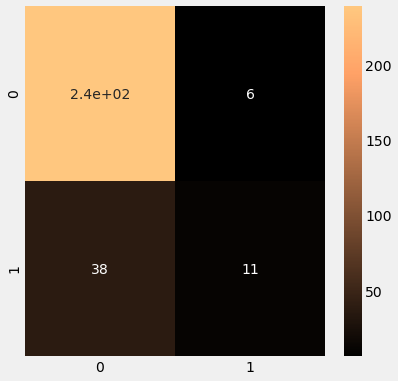

In [32]:
# lets print the confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, 
            cmap = 'copper',
            annot = True)
plt.show()

In [33]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.86      0.98      0.92       245
         Yes       0.65      0.22      0.33        49

    accuracy                           0.85       294
   macro avg       0.75      0.60      0.62       294
weighted avg       0.83      0.85      0.82       294



In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8554421768707483
Testing Accuracy : 0.8231292517006803


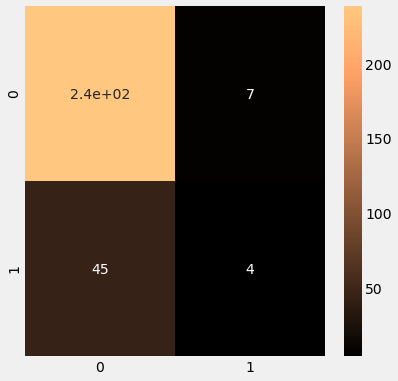

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, 
            cmap = 'copper',
            annot = True)
plt.show()

In [36]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.84      0.97      0.90       245
         Yes       0.36      0.08      0.13        49

    accuracy                           0.82       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.76      0.82      0.77       294



In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7857142857142857


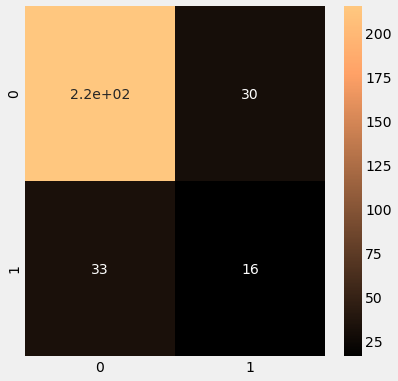

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, 
            cmap = 'copper',
            annot = True)
plt.show()

In [39]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          No       0.87      0.88      0.87       245
         Yes       0.35      0.33      0.34        49

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.78      0.79      0.78       294

